<a href="https://colab.research.google.com/github/zahid60/Artificial_Intelligence_AI/blob/main/AI_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching from kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

kaggle dataset download

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:36<00:00, 32.1MB/s]
100% 1.06G/1.06G [00:36<00:00, 30.9MB/s]


unzipping file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Imporitng necessary files

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalizing
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Our Model

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu",input_shape=(256,256,3)))
model.add(Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     1

Optimizing the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting The model

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 416s 614ms/step - loss: 0.8342 - accuracy: 0.5066 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 2/10
625/625 [==============================] - 374s 597ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 3/10
625/625 [==============================] - 361s 577ms/step - loss: 0.6931 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 375s 599ms/step - loss: 0.6935 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 5/10
625/625 [==============================] - 359s 574ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 373s 596ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 373s 596ms/step - loss: 0.7014 - accuracy: 0.4970 - val_loss: 0.6932 -

In [ ]:
from keras.models import load_model

model.save('vgg64.h5')  # creates a HDF5 file 'my_model.h5'


# returns a compiled model
# identical to the previous one
model = load_model('vgg64.h5')

Btach Normalization

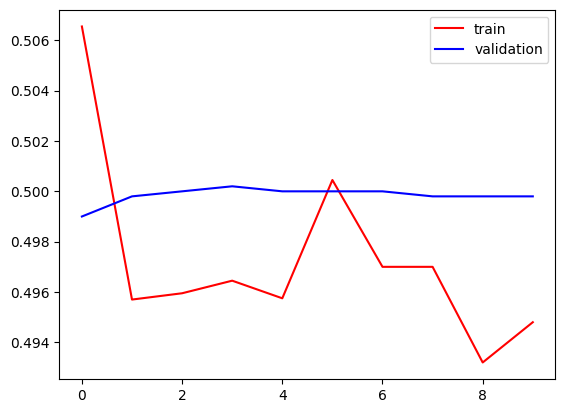

In [ ]:
#with BatchNormalization() and Dropout
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

test

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import random


In [ ]:
import cv2

In [ ]:
test_img= cv2.imread('/content/cat.jpg')

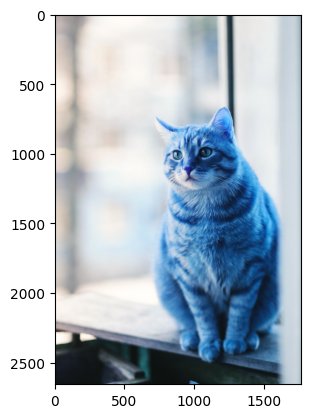

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(2657, 1771, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.50151825]], dtype=float32)

In [ ]:
pred=model.predict(test_input)
pred=pred>0.5
if(pred==0):
  predic='dog'
else:
  predic='cat'

print("Our model says its is a: ",predic)

1/1 [==============================] - 0s 24ms/step
Our model says its is a:  cat
